In [1]:
import sys
sys.path.append("../")
from pyproj import CRS
import numpy as np
import sys
from osgeo import gdal
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
from datetime import datetime
from time import time
from collections import Counter
import pandas as pd #for data analysing
import openpyxl
import os


In [2]:
##### pour savoir ou je suis dans mon environnement
os.getcwd()

'/home/charlottepoussin/variable'

In [3]:
###j'ouvre dataset
NDSI_SON = xr.open_dataset('NDSI_JJA_afterSL_b_nc.nc')

In [4]:
NDSI_SON.z.values

array(['1985-06-01T00:00:00.000000000', '1985-07-01T00:00:00.000000000',
       '1985-08-01T00:00:00.000000000', '1986-06-01T00:00:00.000000000',
       '1986-07-01T00:00:00.000000000', '1986-08-01T00:00:00.000000000',
       '1987-06-01T00:00:00.000000000', '1987-07-01T00:00:00.000000000',
       '1987-08-01T00:00:00.000000000', '1988-06-01T00:00:00.000000000',
       '1988-07-01T00:00:00.000000000', '1988-08-01T00:00:00.000000000',
       '1989-06-01T00:00:00.000000000', '1989-07-01T00:00:00.000000000',
       '1989-08-01T00:00:00.000000000', '1990-06-01T00:00:00.000000000',
       '1990-07-01T00:00:00.000000000', '1990-08-01T00:00:00.000000000',
       '1991-06-01T00:00:00.000000000', '1991-07-01T00:00:00.000000000',
       '1991-08-01T00:00:00.000000000', '1992-06-01T00:00:00.000000000',
       '1992-07-01T00:00:00.000000000', '1992-08-01T00:00:00.000000000',
       '1993-06-01T00:00:00.000000000', '1993-07-01T00:00:00.000000000',
       '1993-08-01T00:00:00.000000000', '1994-06-01

In [5]:
####j'attribue un CRS à mon dataset
crs = CRS.from_string('EPSG:4326')
NDSI_SON.attrs["crs"] = crs.to_proj4()

/home/charlottepoussin/.conda/envs/myenv/lib/python3.12/site-packages/pyproj/crs/crs.py:1293: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


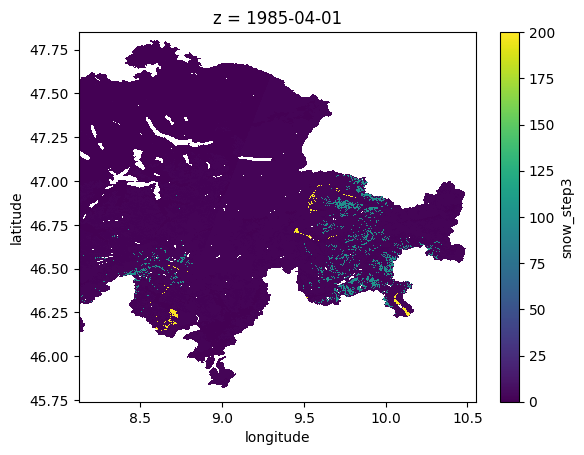

In [6]:
NDSI_SON.snow_step3[1].plot()

In [6]:
##le faire avant l'analyse et après l'analyse afin de voir le pourcentage de changement
##Before
def compute_cloudpercent_b(array):
    cloud = np.sum(array == 2)
    #print(cloud)
    tot_pix = np.count_nonzero((~np.isnan(array)))
    percentage_cloud_b = round(((float(cloud) / float(tot_pix)) * 100),2)
    return percentage_cloud_b

In [7]:
##le faire avant l'analyse et après l'analyse afin de voir le pourcentage de changement
##Before
def compute_snowpercent_b(array):
    snow = np.count_nonzero((array == 1) | (array == 100))
    #print(snow)
    tot_pix = np.count_nonzero((~np.isnan(array)))
    snow_percent_b = round(((float(snow) / float(tot_pix)) * 100),2)
    return snow_percent_b

In [8]:
##le faire avant l'analyse et après l'analyse afin de voir le pourcentage de changement
##Before
def compute_landpercent_b(array):
    land = np.count_nonzero((array == 0) | (array == 200))
    #print(land)
    tot_pix = np.count_nonzero((~np.isnan(array)))
    land_percent_b = round((float(land) / float(tot_pix)) * 100,2)
    return land_percent_b

In [9]:
##le faire avant l'analyse et après l'analyse afin de voir le pourcentage de changement
##After
def compute_cloudpercent_a(array_copy):
    cloud = np.sum(array_copy  == 2)
    tot_pix = np.count_nonzero((~np.isnan(array_copy)))
    cloud_percent = round((float(cloud) / float(tot_pix)) * 100, 2)
    return cloud_percent

In [10]:
##le faire avant l'analyse et après l'analyse afin de voir le pourcentage de changement
##After
def compute_snowpercent_a(array_copy):
    snow = np.count_nonzero((array_copy == 1) | (array_copy == 100))
    tot_pix = np.count_nonzero((~np.isnan(array_copy)))
    snow_percent = round((float(snow) / float(tot_pix)) * 100, 2)
    return snow_percent

In [11]:
##le faire avant l'analyse et après l'analyse afin de voir le pourcentage de changement
##After
def compute_landpercent_a(array_copy):
    land = np.count_nonzero((array_copy == 0) | (array_copy == 200))
    tot_pix = np.count_nonzero((~np.isnan(array_copy)))
    land_percent = round((float(land) / float(tot_pix)) * 100, 2)
    return land_percent

In [12]:
def step4_gapfilling_cloud(array,array_copy):
    cloud_b = np.sum(array==2)
    cloud_a = np.sum(array_copy==2)
    cloud_step4 = cloud_b - cloud_a 
    step4_gf_cloud = round((float(cloud_step4)/float(cloud_b))*100,2)
    #step3_gf_cloud = ((cloud_step3)/(cloud_b))*100
    return step4_gf_cloud

In [13]:
def step4_gapfilling_tot(array,array_copy):
    cloudpercent_b = compute_cloudpercent_b(array)
    cloudpercent_a = compute_cloudpercent_a(array_copy)
    step4_gf_tot = round(((cloudpercent_b)-(cloudpercent_a)),2)
    #step3_gf_tot = ((cloudpercent_b)-(cloudpercent_a))
    return step4_gf_tot

In [14]:
###pour continuer jusuq'à que c'est possible
####pour faire pour chaque i
def step4_internal(array):
    # Je crée une copie pour pouvoir travailler dessus sans changer l'initial
    snow_step4 = array.copy(deep=True)
    
    while True:
        # Get west, north, east & south elements for [1:-1,1:-1] region of input array
        W = snow_step4.values[1:-1, :-2]
        N = snow_step4.values[:-2, 1:-1]
        E = snow_step4.values[1:-1, 2:]
        S = snow_step4.values[2:, 1:-1]

        # Check if at least four arrays have 1 for that same element in that region for snow
        mask_snow = ((((W == 1)| (W == 100)) & ((N == 1)| (N == 100)) & ((E == 1)| (E == 100)) & ((S == 1)| (S == 100))) | (
            ((W == 1)| (W == 100)) & ((N == 1)| (N == 100)) & ((E == 1)| (E == 100))) | (
            ((W == 1)| (W == 100)) & ((N == 1)| (N == 100)) & ((S == 1)| (S == 100))) | (
            ((W == 1)| (W == 100)) & ((E == 1)| (E == 100)) & ((S == 1)| (S == 100))) | (
                ((N == 1)| (N == 100)) & ((E == 1)| (E == 100)) & ((S == 1)| (S == 100)))) & (
                snow_step4.values[1:-1, 1:-1] == 2)

        # Check if at at least four arrays have 0 for that same element in that region for land
        mask_land = ((((W == 0)| (W == 200)) & ((N == 0)| (N == 200)) & ((E == 0)| (E == 200)) & ((S == 0)| (S == 200))) | (
            ((W == 0)| (W == 200)) & ((N == 0)| (N == 200)) & ((E == 0)| (E == 200))) | (
            ((W == 0)| (W == 200)) & ((N == 0)| (N == 200)) & ((S == 0)| (S == 200))) | (
            ((W == 0)| (W == 200)) & ((E == 0)| (E == 200)) & ((S == 0)| (S == 200))) | (
            ((N == 0)| (N == 200)) & ((E == 0)| (E == 200)) & ((S == 0)| (S == 200)))) & (
            snow_step4.values[1:-1, 1:-1] == 2)

        # Use the mask to set corresponding elements
        snow_step4.values[1:-1, 1:-1][mask_snow] = 100
        snow_step4.values[1:-1, 1:-1][mask_land] = 200

        # Check if any modification was made in the current iteration
        if not mask_snow.any() and not mask_land.any():
            break  # Exit the loop if no modifications were made

    return snow_step4

In [15]:
def step4(array):
    # four-pixels neighboring
    print("Starting step 4")
    ##Calculer le % de nuage avant le processus
    percentage_cloud_b = compute_cloudpercent_b(array)
    print("cloud percent before step 4 : " + str(round(percentage_cloud_b,2)))
    percentage_snow_b = compute_snowpercent_b(array)
    percentage_land_b = compute_landpercent_b(array)
    
    
    # compute 4 pixel snow neighboring
    snow_step4 = step4_internal(array)

    percentage_cloud_a = compute_cloudpercent_a(snow_step4)
    print("cloud percent after step 4 : " + str(round(percentage_cloud_a,2)))
    percentage_snow_a = compute_snowpercent_a(snow_step4)
    percentage_land_a = compute_landpercent_a(snow_step4)

    step4_gf_tot = step4_gapfilling_tot(array,snow_step4)
    print("diminution of cloud tot (%) : " + str(round(step4_gf_tot,2)))
    step4_gf_cloud = step4_gapfilling_cloud(array,snow_step4)
    print("diminution of cloud (%) : " + str(round(step4_gf_cloud,2)))
    

    print("End of step 4")

    return snow_step4


In [16]:
cloud_percent_b_list = []
snow_percent_b_list = []
land_percent_b_list = []
cloud_percent_a_list = []
snow_percent_a_list = []
land_percent_a_list = []
step4_gapfilling_tot_list = []
step4_gapfilling_cloud_list = []
time_list = []
snow_step4_list = []

In [17]:
for i in range(len(NDSI_SON.z)):
    print(i)
    snow_step4 = step4(NDSI_SON.snow_step3.isel(z=i))
    snow_step4_list.append(snow_step4)
    cloud_percent_b = compute_cloudpercent_b(NDSI_SON.snow_step3.isel(z=i))
    cloud_percent_b_list.append(cloud_percent_b)
    snow_percent_b = compute_snowpercent_b(NDSI_SON.snow_step3.isel(z=i))
    snow_percent_b_list.append(snow_percent_b)
    land_percent_b = compute_landpercent_b(NDSI_SON.snow_step3.isel(z=i))
    land_percent_b_list.append(land_percent_b)
    time = pd.to_datetime(NDSI_SON.z.isel(z=i).values)
    formatted_date = time.strftime('%Y-%m-%d')
    time_list.append(formatted_date)

    cloud_percent_a = compute_cloudpercent_a(snow_step4)
    cloud_percent_a_list.append(cloud_percent_a)
    snow_percent_a = compute_snowpercent_a(snow_step4)
    snow_percent_a_list.append(snow_percent_a)
    land_percent_a = compute_landpercent_a(snow_step4)
    land_percent_a_list.append(land_percent_a)

    step4_gapfilling_total = step4_gapfilling_tot(NDSI_SON.snow_step3.isel(z=i),snow_step4)
    step4_gapfilling_tot_list.append(step4_gapfilling_total)
    step4_gapfilling_clouds = step4_gapfilling_cloud(NDSI_SON.snow_step3.isel(z=i),snow_step4)
    step4_gapfilling_cloud_list.append(step4_gapfilling_clouds)


0
Starting step 4
cloud percent before step 4 : 42.26
cloud percent after step 4 : 42.08
diminution of cloud tot (%) : 0.18
diminution of cloud (%) : 0.42
End of step 4
1
Starting step 4
cloud percent before step 4 : 12.63
cloud percent after step 4 : 12.47
diminution of cloud tot (%) : 0.16
diminution of cloud (%) : 1.28
End of step 4
2
Starting step 4
cloud percent before step 4 : 16.85
cloud percent after step 4 : 16.77
diminution of cloud tot (%) : 0.08
diminution of cloud (%) : 0.48
End of step 4
3
Starting step 4
cloud percent before step 4 : 20.45
cloud percent after step 4 : 20.34
diminution of cloud tot (%) : 0.11
diminution of cloud (%) : 0.54
End of step 4
4
Starting step 4
cloud percent before step 4 : 10.29
cloud percent after step 4 : 10.25
diminution of cloud tot (%) : 0.04
diminution of cloud (%) : 0.4
End of step 4
5
Starting step 4
cloud percent before step 4 : 43.49
cloud percent after step 4 : 43.39
diminution of cloud tot (%) : 0.1
diminution of cloud (%) : 0.23
En

In [18]:
snow_step4_concat = xr.concat(snow_step4_list, dim='z')
dataset_step4 = xr.Dataset({'snow_step4': snow_step4_concat})

In [19]:
data = {
    'Time': time_list,
    'Cloud Percent Before': cloud_percent_b_list,
    'Snow Percent Before': snow_percent_b_list,
    'Land Percent Before': land_percent_b_list,
    'Cloud Percent After': cloud_percent_a_list,
    'Snow Percent After': snow_percent_a_list,
    'Land Percent After': land_percent_a_list,
    'Cloud Reduction (%)': step4_gapfilling_tot_list,
    'Cloud Reduction After (%)': step4_gapfilling_cloud_list,
}

# Créer un DataFrame à partir du dictionnaire
df_step4 = pd.DataFrame(data)
filename = f'df_step6_4nb_JJA_b.xlsx'
filepath = os.path.join('/home/charlottepoussin/Excels', filename)
df_step4.to_excel(filepath, index=False)

In [20]:
df_step4

,Time,Cloud Percent Before,Snow Percent Before,Land Percent Before,Cloud Percent After,Snow Percent After,Land Percent After,Cloud Reduction (%),Cloud Reduction After (%)
0,1985-06-01,42.26,4.32,53.42,42.08,4.42,53.50,0.18,0.42
1,1985-07-01,12.63,4.34,83.03,12.47,4.46,83.07,0.16,1.28
2,1985-08-01,16.85,1.86,81.29,16.77,1.89,81.34,0.08,0.48
3,1986-06-01,20.45,3.02,76.53,20.34,3.08,76.57,0.11,0.54
4,1986-07-01,10.29,1.10,88.61,10.25,1.12,88.64,0.04,0.40
...,...,...,...,...,...,...,...,...,...
103,2020-07-01,0.35,2.21,97.44,0.31,2.21,97.49,0.04,13.24
104,2020-08-01,0.94,2.74,96.31,0.82,2.74,96.44,0.12,13.47
105,2021-06-01,6.40,9.27,84.33,6.23,9.27,84.49,0.17,2.58
106,2021-07-01,2.91,2.48,94.62,2.63,2.48,94.89,0.28,9.44


In [21]:
dataset_step4.to_netcdf('NDSI_JJA_step6_4nb_b_nc.nc')